In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model  import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

#plt.style.use('fivethertyeight')

import warnings
#warnings.filterwarnings('ignore')


In [28]:
df=pd.read_csv("/content/diabetes.csv")


# Explore Data

---



In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
df.duplicated().sum()

0

# Analysis

In [33]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

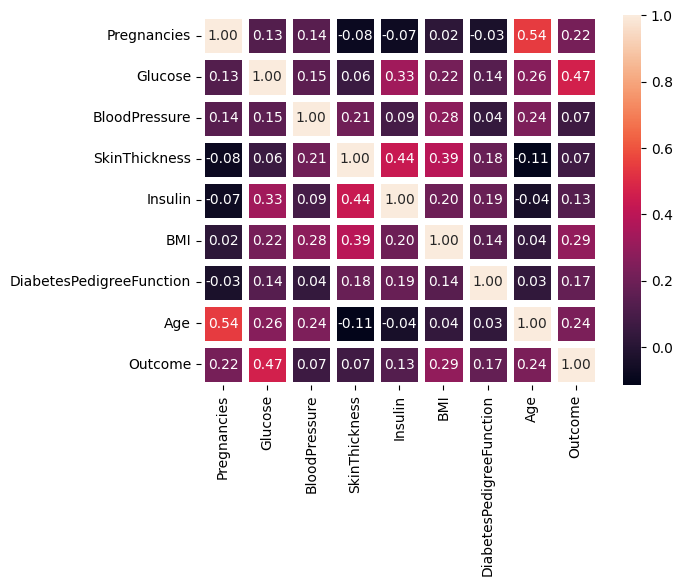

In [34]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=5)

<Axes: xlabel='Outcome', ylabel='count'>

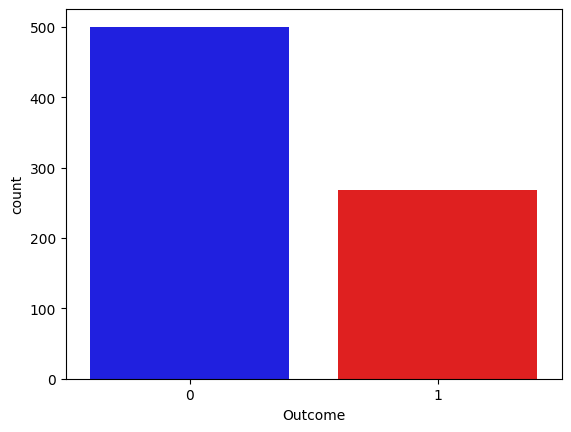

In [39]:
sns.countplot(x='Outcome',data=df,palette=['b','r'])

<ipython-input-46-daaca4045258>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Pregnancies"])


<function matplotlib.pyplot.show(close=None, block=None)>

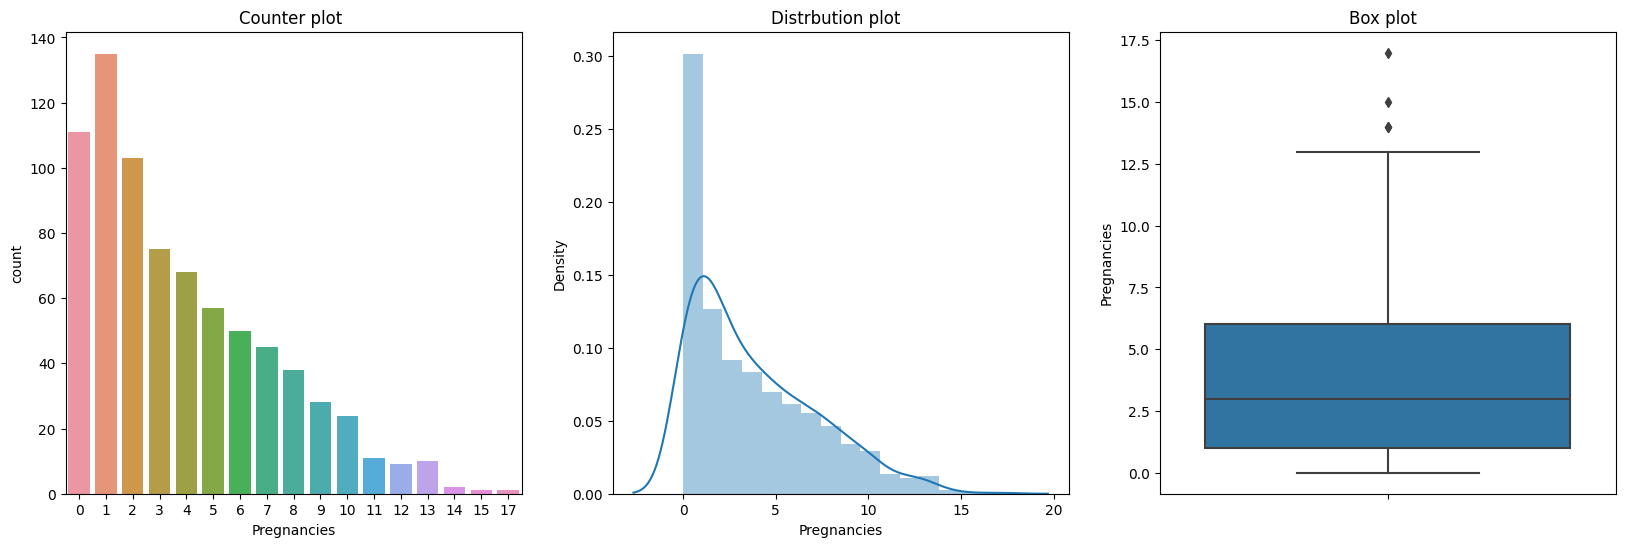

In [46]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Counter plot ')
sns.countplot(x= 'Pregnancies',data=df)

plt.subplot(1,3,2)
plt.title('Distrbution plot  ')
sns.distplot(df["Pregnancies"])

plt.subplot(1,3,3)
plt.title('Box plot  ')
sns.boxplot(y=df["Pregnancies"])

plt.show

<Axes: xlabel='Age'>

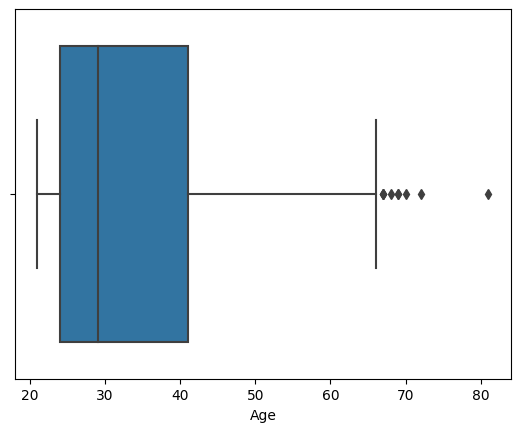

In [48]:
sns.boxplot(x=df.Age)

# Create Model

In [169]:
x = df.drop('Outcome',axis=1)
y = df["Outcome"]

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [171]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier(n_estimators=1000)

In [172]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1 = []
result2 = []
result3 = []

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
accuracy is :  0.8181818181818182 recall is :  0.6938775510204082 f1 is :  0.7083333333333333


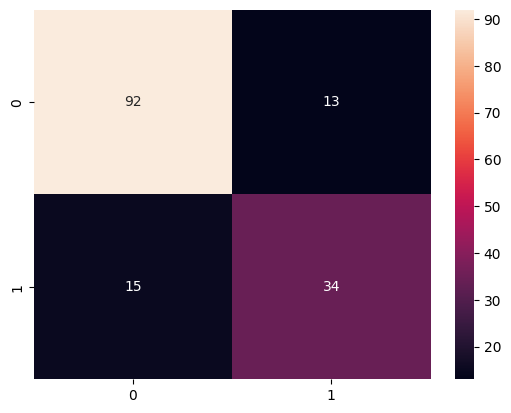

In [176]:
def ras(model1):
   model1.fit(x_train,y_train)
   pre=model1.predict(x_test)
   accuracy=accuracy_score(pre,y_test)
   recall=recall_score(pre,y_test)
   f1=f1_score(pre,y_test)
   result1.append(accuracy)
   result2.append(recall)
   result3.append(f1)

   sns.heatmap(confusion_matrix(pre,y_test),annot=True)
   print(model1)
   print('accuracy is : ',accuracy,'recall is : ',recall,'f1 is : ',f1)
ras(model1)







SVC()
accuracy is :  0.8116883116883117 recall is :  0.6956521739130435 f1 is :  0.6881720430107526


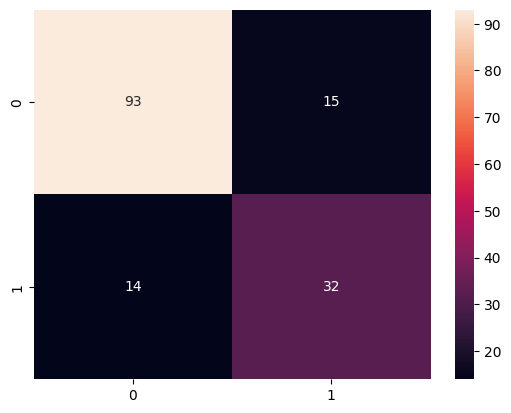

In [177]:
ras(model2)

RandomForestClassifier()
accuracy is :  0.7987012987012987 recall is :  0.66 f1 is :  0.6804123711340208


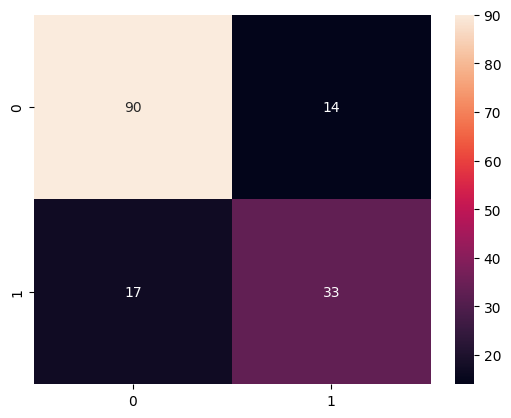

In [178]:
ras(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is :  0.6948051948051948 recall is :  0.5 f1 is :  0.5436893203883495


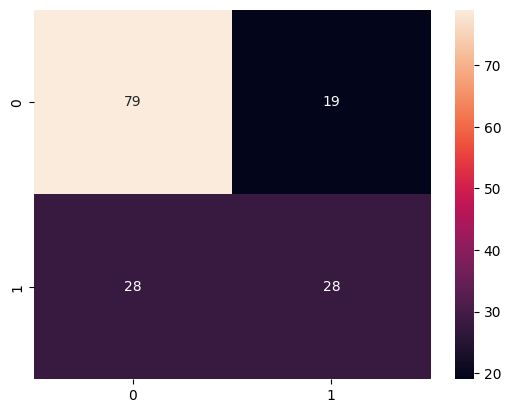

In [179]:
ras(model4)

In [194]:
result1

[0.8181818181818182,
 0.8116883116883117,
 0.7987012987012987,
 0.6948051948051948]

In [193]:
result2

[0.6938775510204082, 0.6956521739130435, 0.66, 0.5]

In [192]:
result3

[0.7083333333333333,
 0.6881720430107526,
 0.6804123711340208,
 0.5436893203883495]

In [195]:
finalresult=pd.DataFrame({'Algorithm':columns,'Accuracy':result1,'recall':result2,'f1':result3})

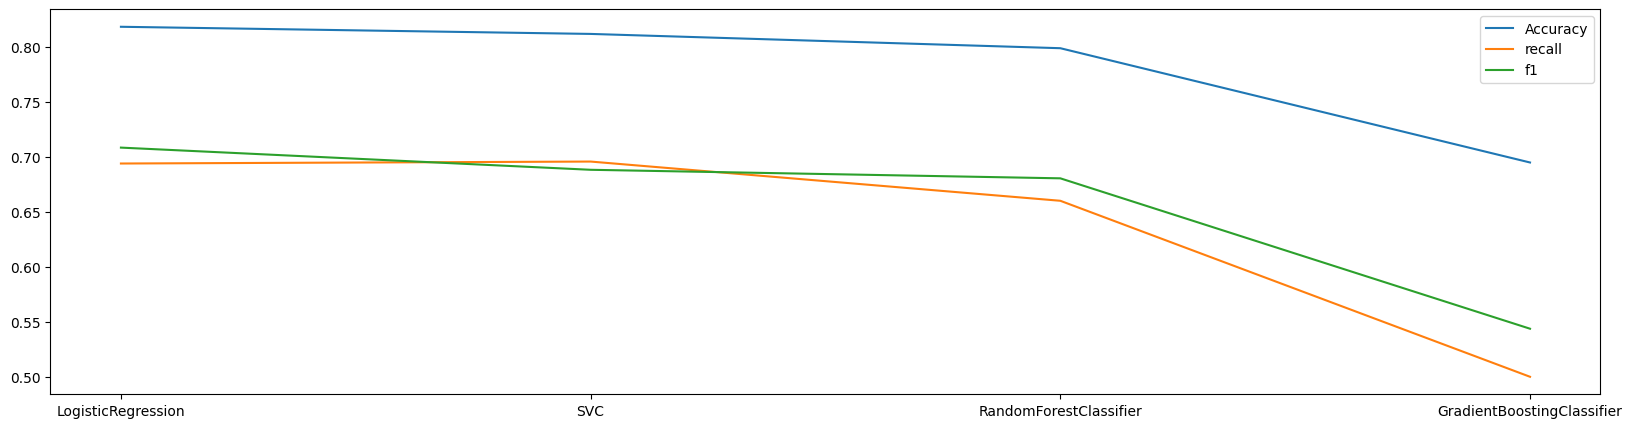

In [201]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(finalresult.Algorithm,result1,label='Accuracy')
plt.plot(finalresult.Algorithm,result2,label='recall')
plt.plot(finalresult.Algorithm,result3,label='f1')
plt.legend()
plt.show()
